### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install ydata-profiling

In [9]:
# Import the above libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ydata_profiling import ProfileReport

In [10]:
# Import excel file
df = pd.read_excel('Alerts_Sample.xlsx')
#print(df['alert_code'].value_counts())

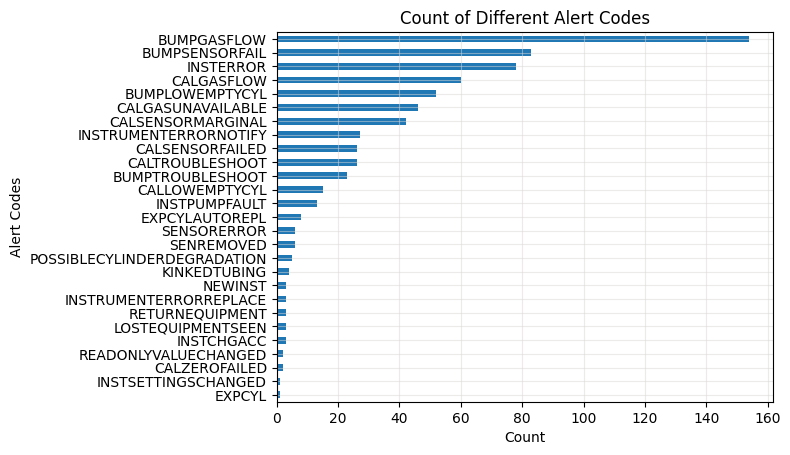

In [3]:
# Simple barh graph
df['alert_code'].value_counts().plot(kind='barh')
plt.title('Count of Different Alert Codes')
plt.xlabel('Count')
plt.ylabel('Alert Codes')
# Invert y-axis
plt.gca().invert_yaxis()
# Create the grid 
plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
# Show the graph
plt.show()

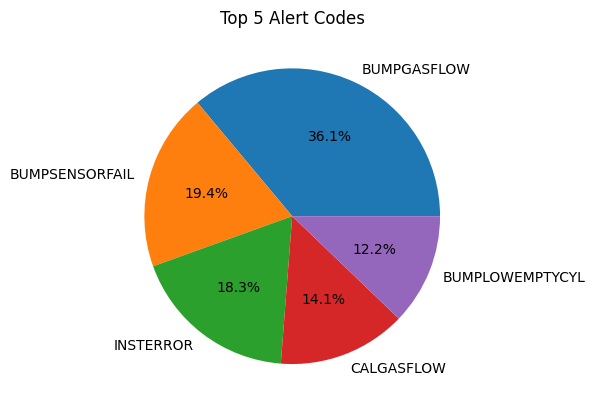

In [4]:
# Simple pie chart
data = df['alert_code'].value_counts().head(5)
data.plot.pie(title='Top 5 Alert Codes', y='data',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
# Adding a legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

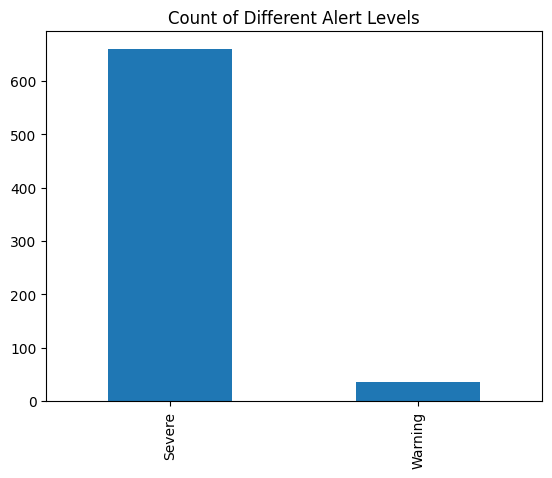

In [5]:
# Simple bar graph
df['AlertLevel'].value_counts().plot(kind="bar")
plt.title('Count of Different Alert Levels')
plt.show()

In [6]:
# Calculate Summary Statistics for All Numeric Variables
df.describe()

,ID,Account_ID,Equipment_id,Component_ID,event_Id,source,Acknowledged
count,6.950000e+02,695.0,6.950000e+02,1.810000e+02,6.950000e+02,0.0,695.000000
mean,2.849437e+12,2824.0,1.783132e+12,2.119441e+12,2.849437e+12,NaN,0.991367
std,9.316750e+11,0.0,6.231497e+11,1.157344e+12,9.316750e+11,NaN,0.092579
min,1.316069e+12,2824.0,1.302192e+12,1.299608e+12,1.316069e+12,NaN,0.000000
25%,2.005533e+12,2824.0,1.313507e+12,1.313507e+12,2.005533e+12,NaN,1.000000
50%,3.009553e+12,2824.0,1.348996e+12,1.333251e+12,3.009553e+12,NaN,1.000000
75%,3.018899e+12,2824.0,2.003113e+12,3.009115e+12,3.018899e+12,NaN,1.000000
max,4.104988e+12,2824.0,4.031267e+12,4.083757e+12,4.104988e+12,NaN,1.000000


In [7]:
# Calculate Summary Statistics for All String Variables
df.describe(include='object')

,Time,alert_code,AlertLevel,Summary,rec_update_time,Acknowledged_By,Acknowledged_time
count,695,695,695,695,695,689,689
unique,437,27,2,68,412,2,368
top,06-DEC-17 04.45.28.469000000 PM,BUMPGASFLOW,Severe,iNet Alert: Bump Test - Gas Flow Inhibited,25-JUL-16 11.43.00.884000000 AM,iNet - Auto,25-JUL-16 11.43.00.324000000 AM
freq,5,154,660,135,27,605,27


In [11]:
# y-data profiling, read dataset into dataframe -> create profile report -> show within the notebook
df = pd.read_csv('Alerts_Sample.csv')
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_file("Alerts_Sample.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]